In [27]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.models import Model, load_model
from keras.initializers import glorot_uniform
from keras.wrappers.scikit_learn import KerasClassifier,KerasRegressor
from sklearn.grid_search import GridSearchCV 
from keras import regularizers
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

## 1.读取-划分数据

In [2]:
def importdata():
    path = r"C:\Users\Administrator\Desktop\py\data2.txt"
    df = pd.read_table(path)
    columns = df.columns
    #print(columns)

    dfdata = df[['latgpsutm', 'lnggpsutm', 'lnglacutm', 'latlacutm']]
    #print(len(dfdata))
    dfdata = dfdata.drop_duplicates()#删去重复项
    #print(len(dfdata))
    return dfdata

df = importdata()

In [3]:
df1 = shuffle(df)
df1 = df.set_index([list(range(len(df1)))])
index = int(len(df1)*0.7)
df1_train=df1[:index]
df1_test=df1[index:]

In [4]:
df_train=df.sample(frac=0.7)
df_train=df_train.reset_index(drop=True)

In [5]:
df_train.isnull().values.any()

False

In [6]:
list(df_train )

['latgpsutm', 'lnggpsutm', 'lnglacutm', 'latlacutm']

In [7]:
X_train=df_train[['lnglacutm','latlacutm']].as_matrix()
y_train=df_train[['lnggpsutm','latgpsutm']].as_matrix()

In [8]:
X_train

array([[  353809.1917,  3458910.2942],
       [  357161.5617,  3462181.514 ],
       [  355098.0778,  3456892.908 ],
       ..., 
       [  357031.0118,  3457022.0537],
       [  357161.5617,  3462181.514 ],
       [  356426.7637,  3453517.4662]])

In [9]:
y_train

array([[  353800.7971,  3458901.9583],
       [  357179.5107,  3462177.1504],
       [  355093.9022,  3456887.9753],
       ..., 
       [  361642.2236,  3455097.6567],
       [  357203.748 ,  3462174.049 ],
       [  356381.6778,  3456491.7018]])

## 2.建立神经网络

In [46]:
def NN_model(optimizer='adam',hidden_units=100,dropout_rate=0.3,L2_rate=.001):
    model=Sequential()
    model.add(Dense(hidden_units,activation='relu',input_dim=2,kernel_regularizer=regularizers.l2(L2_rate)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(2,activation='relu',kernel_regularizer=regularizers.l2(L2_rate)))
    
    model.compile(loss='mean_squared_error',optimizer=optimizer,metrics=['accuracy'])
    return model

In [47]:
##### nn_model=NN_model()
nn_reg=KerasRegressor(build_fn=NN_model,nb_epoch=100,batch_size=50,verbose=-1)

In [48]:
nn_reg.fit(X_train,y_train)

Epoch 1/1


In [49]:
cross_val_score(nn_reg,X_train,y_train,cv=3)

Epoch 1/1
Epoch 1/1
Epoch 1/1


array([ -4.86246014e+12,  -4.93826027e+12,  -3.03430412e+12])

In [50]:
nn_model.fit(X_train,y_train,epochs=30,validation_split=0.2,batch_size=50,verbose=-1)

Train on 893 samples, validate on 224 samples
Epoch 1/30
Epoch 2/30
Epoch 3/30
Epoch 4/30
Epoch 5/30
Epoch 6/30
Epoch 7/30
Epoch 8/30
Epoch 9/30
Epoch 10/30
Epoch 11/30
Epoch 12/30
Epoch 13/30
Epoch 14/30
Epoch 15/30
Epoch 16/30
Epoch 17/30
Epoch 18/30
Epoch 19/30
Epoch 20/30
Epoch 21/30
Epoch 22/30
Epoch 23/30
Epoch 24/30
Epoch 25/30
Epoch 26/30
Epoch 27/30
Epoch 28/30
Epoch 29/30
Epoch 30/30


In [51]:
nn_model.evaluate(X_train,y_train)

1117/1117 [==============================] - 0s 14us/step


[244228298.45658013, 1.0]

In [52]:
test_all=df1_test.sample(frac=1).iloc[0:10]
test_X=test_all[['lnglacutm', 'latlacutm']].iloc[0:10].as_matrix()
test_y=test_all[['lnggpsutm','latgpsutm']].iloc[0:10].as_matrix()

In [53]:
test_X

array([[  358081.7318,  3461969.9346],
       [  357161.5617,  3462181.514 ],
       [  355087.74  ,  3456997.8876],
       [  355150.38  ,  3459291.8532],
       [  358098.4223,  3461979.6062],
       [  358081.7318,  3461969.9346],
       [  357929.6759,  3461975.6018],
       [  357161.5617,  3462181.514 ],
       [  358081.7318,  3461969.9346],
       [  357161.5617,  3462181.514 ]])

In [54]:
test_y

array([[  358086.0068,  3461975.3493],
       [  357226.2534,  3462148.6129],
       [  355079.282 ,  3457002.2604],
       [  353795.8014,  3460042.2103],
       [  358089.4204,  3461974.3053],
       [  358085.8044,  3461974.4651],
       [  358102.3264,  3462013.3781],
       [  357192.2416,  3462168.1078],
       [  358084.9327,  3461973.3682],
       [  357207.1176,  3462176.7749]])

In [55]:
pre_ten=nn_model.predict(test_X)

In [56]:
pre_ten

array([[  357909.21875,  3442002.25   ],
       [  357912.53125,  3441540.75   ],
       [  357346.4375 ,  3435291.     ],
       [  357580.1875 ,  3437447.25   ],
       [  357910.5625 ,  3442022.25   ],
       [  357909.21875,  3442002.25   ],
       [  357906.8125 ,  3441898.75   ],
       [  357912.53125,  3441540.75   ],
       [  357909.21875,  3442002.25   ],
       [  357912.53125,  3441540.75   ]], dtype=float32)

In [57]:
pre_x=pre_ten[:,0]
pre_y=pre_ten[:,1]


In [58]:
import matplotlib
import matplotlib.pyplot as plt

In [59]:
def plot_site(haha,color):
    x=haha[:,0]
    y=haha[:,1]
    plt.plot(x, y, color=color) #定义画笔


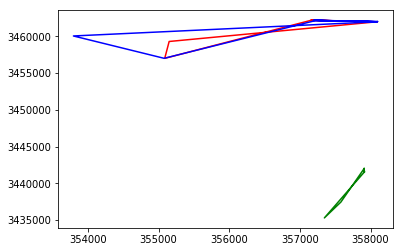

In [60]:
plot_site(test_X,'r')
plot_site(test_y,'b')
plot_site(pre_ten,'g')

plt.show()